In [5]:
import sys
import numpy as np

print("python: {}".format(sys.version))
print("NumPy: {}".format(np.__version__))

python: 3.6.3 |Anaconda custom (64-bit)| (default, Oct 15 2017, 03:27:45) [MSC v.1900 64 bit (AMD64)]
NumPy: 1.13.3


In [6]:
from numpy import linalg

In [9]:
# define an array
A = np.arange(9) - 3
A

array([-3, -2, -1,  0,  1,  2,  3,  4,  5])

In [11]:
B = A.reshape((3,3))
B

array([[-3, -2, -1],
       [ 0,  1,  2],
       [ 3,  4,  5]])

In [13]:
# Euclidean (L2) norm = default
print(np.linalg.norm(A))
print(np.linalg.norm(B))

8.30662386292
8.30662386292


In [15]:
# the Frogenius norm is the L2 norm for a matrix
print(np.linalg.norm(B, 'fro'))

8.30662386292


In [17]:
# the max norm (P = infinity)
print(np.linalg.norm(A, np.inf))
print(np.linalg.norm(B, np.inf))

5.0
12.0


In [19]:
# vector normalization - normalization to produce a unit vector
norm = np.linalg.norm(A)
A_unit = A / norm
print(A_unit)

[-0.36115756 -0.24077171 -0.12038585  0.          0.12038585  0.24077171
  0.36115756  0.48154341  0.60192927]


In [21]:
# the magnitude of a unit vector is equal to 1
np.linalg.norm(A_unit)

0.99999999999999989

 # Eigendecomposition 
Eigenvalues and eigenvectors are easy to find with python and numpy. Remember, an eigenvector of a square matrix A is a nonzero vector v such that multiplication by A alters only the scale of v.
Av = lambda v
The scalar lambda is known as the eigenvalue corresponding to this eigenvector

In [23]:
# find the eigenvalues and eigenvectors for a simple square matrix
A = np.diag(np.arange(1,4))
A

array([[1, 0, 0],
       [0, 2, 0],
       [0, 0, 3]])

In [25]:
eigenvalues, eigenvectors  = np.linalg.eig(A) 

In [26]:
#returns the eigenvalues for the matrix 
eigenvalues

array([ 1.,  2.,  3.])

In [28]:
# returns the eigenvectors for the matrix
eigenvectors

array([[ 1.,  0.,  0.],
       [ 0.,  1.,  0.],
       [ 0.,  0.,  1.]])

In [30]:
# the eigenvalue w[i] corresponds to the eigenvector v[:,1]
print('Eigenvalue: {}'.format(eigenvalues[1]))
print('Eigenvector: {}'.format(eigenvectors[:,1]))

Eigenvalue: 2.0
Eigenvector: [ 0.  1.  0.]


We can eaily double check these eigenvalues and eigenvectos by plugging them into the eigendecomposition equation
  A = V*diag(lambda)*V (inverse)

In [35]:
# verify eigendcomposition
matrix = np.matmul(np.diag(eigenvalues), np.linalg.inv(eigenvectors))
output = np.matmul(eigenvectors, matrix).astype(np.int)
print(output)

[[1 0 0]
 [0 2 0]
 [0 0 3]]


In [38]:
# import necessary matplotlib libraries 
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

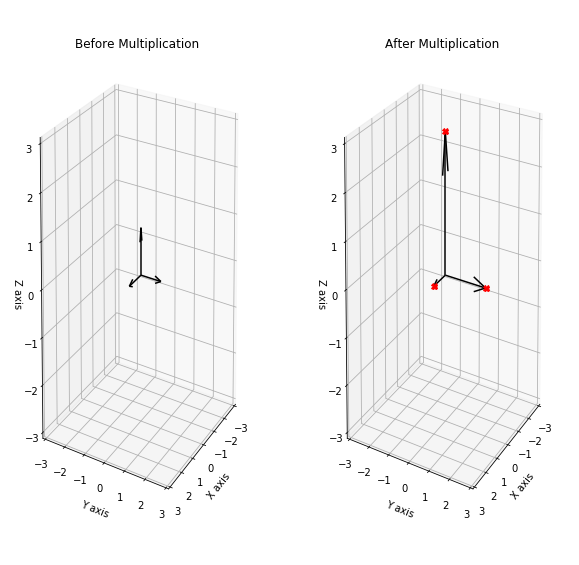

In [45]:
# plot the eigenvectors
origin = [0,0,0]
fig = plt.figure(figsize = (10,10))
ax1 = fig.add_subplot(121, projection = '3d')
ax1.quiver(origin, origin, origin, eigenvectors[0,:], eigenvectors[1,:], eigenvectors[2,:], color = 'k')
ax1.set_xlim([-3,3])
ax1.set_ylim([-3,3])
ax1.set_zlim([-3,3])
ax1.set_xlabel('X axis')
ax1.set_ylabel('Y axis')
ax1.set_zlabel('Z axis')
ax1.view_init(15, 30)
ax1.set_title('Before Multiplication')

# multiply original matrix by eigenvectors
new_eig = np.matmul(A, eigenvectors)
ax2 = plt.subplot(122, projection = '3d')
ax2.quiver(origin, origin, origin, new_eig[0,:], new_eig[1,:], new_eig[2,:], color = 'k')

ax2.plot((eigenvalues[0]*eigenvectors[0]), (eigenvalues[1]*eigenvectors[1]), (eigenvalues[2]*eigenvectors[2]), 'rX')
ax2.set_xlim([-3,3])
ax2.set_ylim([-3,3])
ax2.set_zlim([-3,3])
ax2.set_xlabel('X axis')
ax2.set_ylabel('Y axis')
ax2.set_zlabel('Z axis')
ax2.view_init(15, 30)
ax2.set_title('After Multiplication')


plt.show()